In [1]:
%load_ext autoreload
%autoreload 2

In [137]:
import torch_geometric
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric import utils
from torch_geometric.utils import to_dense_adj
import torch
import networkx as nx
import matplotlib.cm as cm
import scipy.sparse as sp
import matplotlib.pyplot as plt
from ogb.graphproppred import GraphPropPredDataset


from stitt import get_laplacian_eig

In [138]:
dataset = GraphPropPredDataset(name='ogbg-molhiv')

Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 41127/41127 [00:00<00:00, 123998.67it/s]


Saving...


In [147]:
d[0].keys()

dict_keys(['edge_index', 'edge_feat', 'node_feat', 'num_nodes'])

In [4]:
split_idx = dataset.get_idx_split()
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False)

/home/ziv/mambaforge/envs/default/lib/python3.12/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
encoder = AtomEncoder(emb_dim=4096)
emb = encoder(d.x).detach()

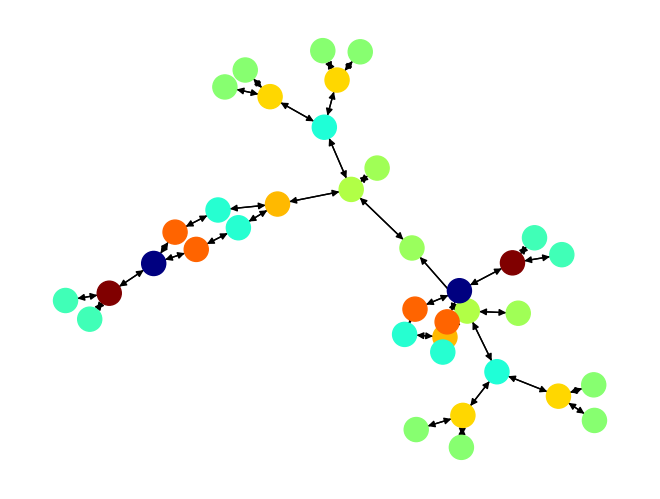

In [90]:
dx = utils.to_networkx(dataset[19])
eigvals, eig_vects = get_laplacian_eig(dataset[19])
colors = eig_vects.T[2]
nx.draw(
    dx,
    node_color=colors,
    with_labels=False,
    # ax=axs[i // 2][i % 2],
    cmap=cm.jet_r,
    vmin=min(colors),
    vmax=max(colors),
)

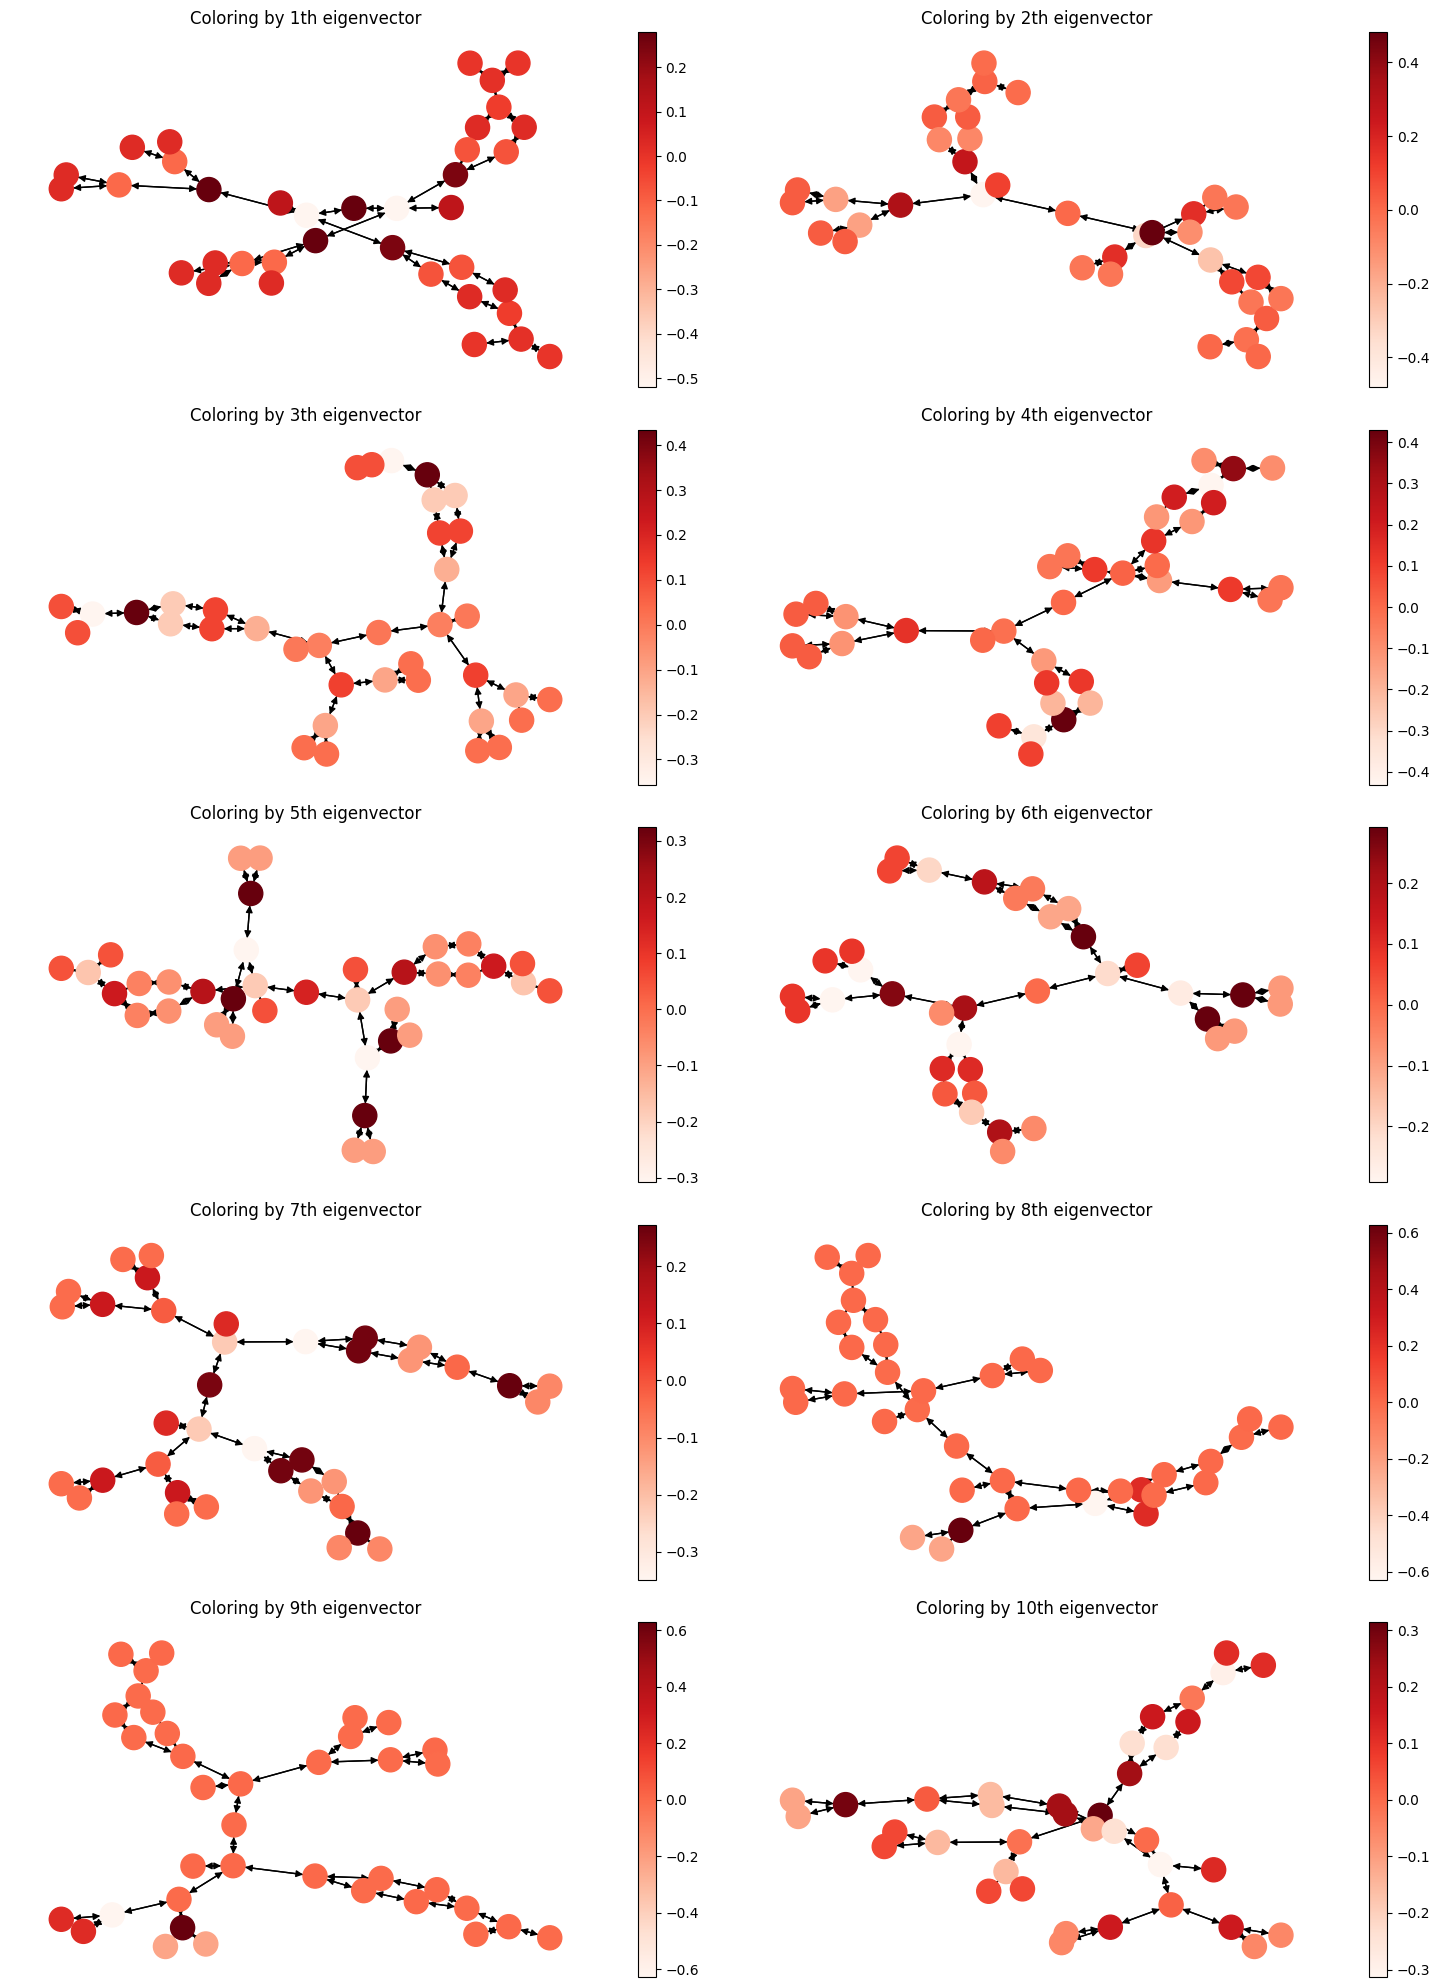

In [134]:
d = dataset[19]

print()
eigvals, eig_vects = get_laplacian_eig(d)


fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for i, eigenvec in enumerate(eig_vects.T[:10]):
    ax = axs[i // 2][i % 2]
    nx.draw(
        dx,
        node_color=eigenvec,
        with_labels=False,
        ax=ax,
        cmap=cm.Reds,
        vmin=min(eigenvec),
        vmax=max(eigenvec)
    )

    # Add title
    ax.set_title(f"Coloring by {i+1}th eigenvector")

    # Add colorbar
    mappable = cm.ScalarMappable(cmap=cm.Reds)
    mappable.set_clim(vmin=min(eigenvec), vmax=max(eigenvec))
    cbar = plt.colorbar(mappable, ax=ax)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [136]:
dataset[0].x.shape

torch.Size([19, 9])

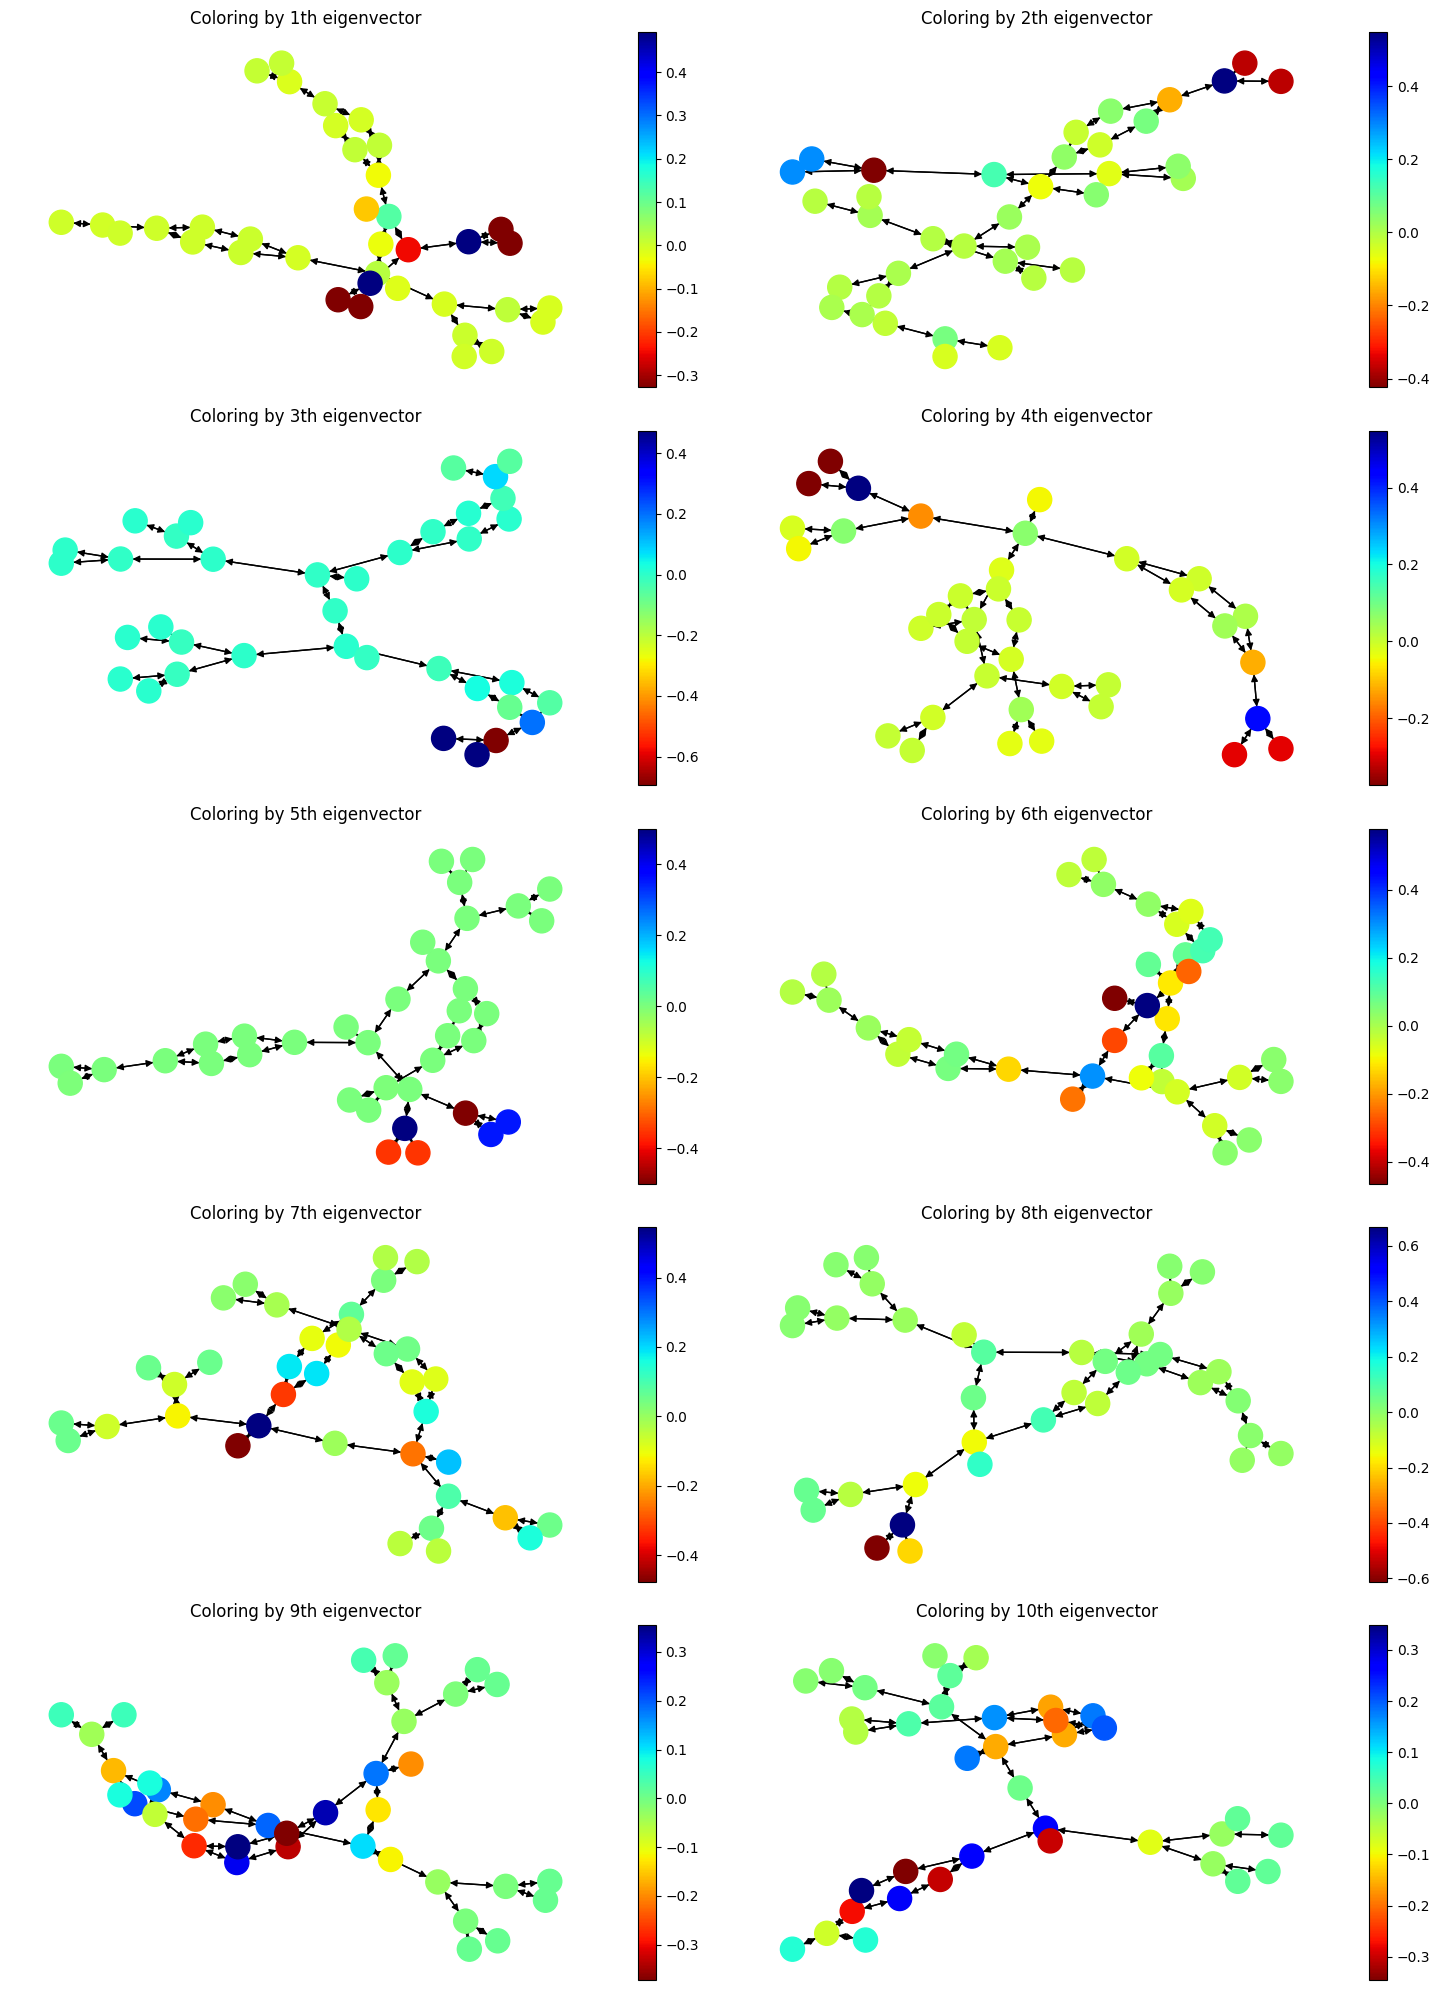

In [117]:
d = dataset[19]

print()
eigvals, eig_vects = get_laplacian_eig(d, normalization="rw")


fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for i, eigenvec in enumerate(eig_vects.T[:10]):
    ax = axs[i // 2][i % 2]
    nx.draw(
        dx,
        node_color=eigenvec,
        with_labels=False,
        ax=ax,
        cmap=cm.jet_r,
        vmin=min(eigenvec),
        vmax=max(eigenvec)
    )

    # Add title
    ax.set_title(f"Coloring by {i+1}th eigenvector")

    # Add colorbar
    mappable = cm.ScalarMappable(cmap=cm.jet_r)
    mappable.set_clim(vmin=min(eigenvec), vmax=max(eigenvec))
    cbar = plt.colorbar(mappable, ax=ax)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [110]:
eigvals, eig_vects = get_laplacian_eig(d, d.num_nodes)
eigvals_large, eig_vects_large = get_laplacian_eig(d, d.num_nodes * 2)

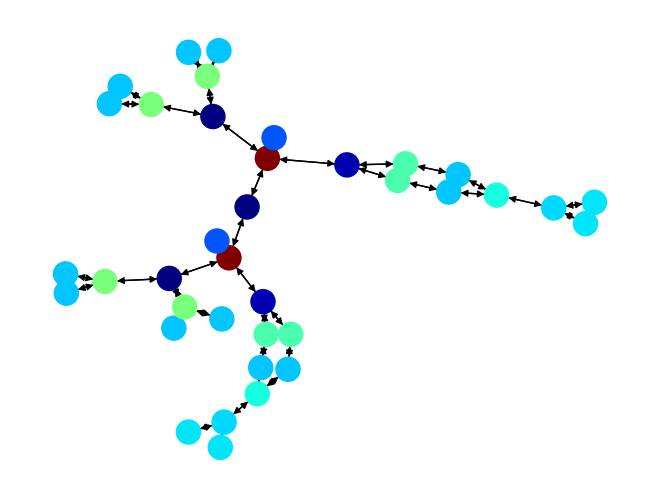

In [111]:
dx = utils.to_networkx(dataset[19])
colors = eig_vects.T[0]
nx.draw(
    dx,
    node_color=colors,
    with_labels=False,
    # ax=axs[i // 2][i % 2],
    cmap=cm.jet_r,
    vmin=min(colors),
    vmax=max(colors),
)

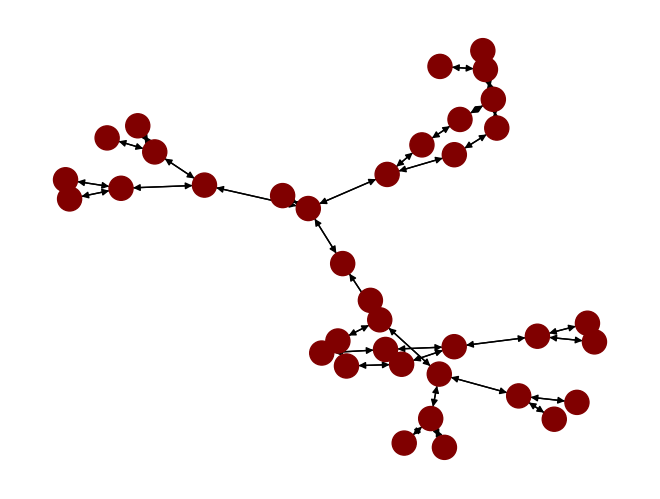

In [113]:
dx = utils.to_networkx(dataset[19])
colors = eig_vects_large.T[0][d.num_nodes:]
nx.draw(
    dx,
    node_color=colors,
    with_labels=False,
    # ax=axs[i // 2][i % 2],
    cmap=cm.jet_r,
    vmin=min(colors),
    vmax=max(colors),
)